# Lecture 4: Optimization Using Python - SciPy

In this lecture / tutorial, we will learn how to solve some simple optimization problems using Python, focusing on the specific optimization library ```scipy.optimize```.

***
## Learning goals
- Obtain an overview of optimization problems that can be easily solved using SciPy.
- Learn the syntax to solve some simple optimization problems using SciPy
- Test your understanding by solving a few of the practice problems in each section.

***
# Prerequisites for running this notebook

You should have Python 3.6 installed on your computer, with all necessary packages installed.

We recommend that you install Anaconda (Python 3.6 version) from the following links depending on your OS:
- For Windows: https://www.anaconda.com/download/#windows
- For macOS: https://www.anaconda.com/download/#macos
- For Linux: https://www.anaconda.com/download/#linux

**If you are not using Anaconda, it is your responsibility to make sure that Python and all necessary packages are correctly installed and configured to be able to run this notebook.**

***

Once Anaconda is installed, open a **Terminal** (if you are using macOS / Linux), or **Anaconda Prompt** (if you are using Windows), and then create a new Python environment called **cme193**, by running the following command:<br>
> ```conda create -n cme193 python=3.6```

Next, change to the newly created virtual environment by running the command:

On Windows
> ```activate cme193``` <br>

On macOS or Linux
> ```source activate cme193```

Next install all the necessary packages by running the following commands:

> ```conda install nb_conda``` <br>
> ```conda install -c anaconda scipy``` <br>
> ```conda install -c conda-forge matplotlib``` <br>

Now navigate to the directory containing this .ipynb file, from inside the terminal, and start jupyter notebook by typing the following command:
> ```jupyter notebook```

You should now be able to launch the .ipynb file from the browser. For more information on jupyter notebooks, read the <a href="https://jupyter-notebook.readthedocs.io/en/stable/notebook.html" style="text-decoration: none;">user documentation</a>.

***
# 1. Introduction to scipy.optimize

In this section we will learn how to solve some simple optimization problems using ```scipy```. The ```scipy.optimize``` package already gives us a lot of basic tools to solve a wide variety of important optimization problems. For more information please read the <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html" style="text-decoration: none;">documentation</a>.

We can import the module as follows (henceforth to be referred to as ```sciopt```). We also import some other modules we will use in this notebook.

In [2]:
import scipy.optimize as sciopt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

***
## 1.1 Solving a linear program

The first example we will look at is that of solving a **linear program (LP)**. A linear program is any optimization problem of the following form:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

where $c, x \in \mathbb{R}^n$, $A_{ub} \in \mathbb{R}^{m \times n}$, $A_{eq} \in \mathbb{R}^{p \times n}$, $b_{ub} \in \mathbb{R}^{m}$, and $b_{eq} \in \mathbb{R}^{p}$. It should be noted that all LP can be put in this form.

```scipy.optimize``` provides a simple function ```scipy.optimize.linprog``` to solve such problems, which is documented <a href="https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog" style="text-decoration: none;">here</a>. Currently, the only available algorithm that is implemented are the **simplex method**, and the **interior point method**. We will demonstrate its usage using a few examples.

***
### Example 1.1.1
Let us consider the problem

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

In order to solve it, we first need to transform it to the form that ```scipy.optimize.linprog``` requires. The problem is clearly equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& -5 x_1 - x_2 \leq 0
\end{split}
\end{equation}
$$

The following Python code then solves this problem.

In [3]:
# Define problem parameters
c = [1, 2]
A_ub = [[1, 0], [-5, -1]]
b_ub = [1, 0]
bounds = ((None, None), (None, None))

# Solve the LP
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

In [4]:
# Print the result
print(result)

     fun: -9.000000000000004
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([ 1., -5.])


***
Notice that we must explicitly set the ```bounds``` parameter in the above problem. If we don't pass this parameter, the default assumption is that the variables are non-negative.

You can additionally pass the parameter ```options={"disp": True}``` to print convergence messages from the solver. **Solver method specific parameters can also be passed as optional parameters in** ```options```.

In [8]:
# Solve the LP and print convergence messages
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, options={"disp": True})

Optimization terminated successfully.
         Current function value: -9.000000   
         Iterations: 2


In [9]:
# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1])
print("Optimal value = ", obj_optimal)

Optimal solution: x1 =  1.0 , x2 =  -5.000000000000002
Optimal value =  -9.000000000000004


***
### Example 1.1.2
Let us change the problem by adding an equality constraint

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0 \\
& x_1 + x_2 = 3.
\end{split}
\end{equation}
$$

In order to solve it, we first need to transform it to the form that ```scipy.optimize.linprog``` requires. The problem is clearly equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& -5 x_1 - x_2 \leq 0 \\
& x_1 + x_2 = 3.
\end{split}
\end{equation}
$$

The following Python code then solves this problem.

In [11]:
# Define problem parameters
c = [1, 2]
A_ub = [[1, 0], [-5, -1]]
b_ub = [1, 0]
A_eq = [[1, 1]]
b_eq = [3]
bounds = ((None, None), (None, None))

# Solve the LP
print("Solving the LP")
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method="interior-point",bounds=bounds, options={"disp": True})

# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("\n")
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1])
print("Optimal value = ", obj_optimal)

Solving the LP
Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 0.0                 -                1.0                 0.0                 
0.1566803068894     0.1566803068894     8.881784197001e-16  0.8515349725462  0.1566803068894     4.208178595855      
0.02556734796921    0.02556734796906    2.22044604925e-16   0.8476102933165  0.02556734796903    4.981156376434      
8.821582555143e-05  8.821582574002e-05  2.22044604925e-16   0.9991255317789  8.821582574134e-05  4.998460865517      
4.411222087608e-09  4.411222277923e-09  0.0                 0.9999499952241  4.411222297888e-09  4.999999923037      
2.205125072125e-13  2.205722899724e-13  2.22044604925e-16   0.9999499922374  2.205710759689e-13  4.999999999996      
Optimization terminated successfully.


Optimal solution: x1 =  0.9999999999999458 , x2 =  1.999999999998104
Optimal value =  4.999999999996154


#### Alternate way of solving the problem
Notice that the inequality constraint ```x1 <= 1``` is a **bound constraint**. Hence, an alternate way to solve **Example 1.1.2** is as follows:

In [12]:
# Define problem parameters
c = [1, 2]
A_ub = [[-5, -1]]
b_ub = [0]
A_eq = [[1, 1]]
b_eq = [3]
bounds = ((None, 1), (None, None))

# Solve the LP
print("Solving the LP")
result = sciopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, options={"disp": True})

# Extract the solution and print it
obj_optimal = result['fun']
x = result['x']
print("\n")
print("Optimal solution: x1 = ", x[0], ", x2 = ", x[1])
print("Optimal value = ", obj_optimal)

Solving the LP
Optimization terminated successfully.
         Current function value: 5.000000    
         Iterations: 2


Optimal solution: x1 =  1.0 , x2 =  2.0
Optimal value =  5.0


***
### InClass Exercise 1
Here is another interesting example. Consider the following optimization problem

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & \max \{|x_1|, |x_2|, |x_3|\}  \\
\text{subject to} \;\; & x_1 + x_2 + x_3 \geq 1.
\end{split}
\end{equation}
$$

It is easy to show that this problem is equivalent to the problem (this is called the **epigraph form** of the problem)

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & s  \\
\text{subject to} \;\; & |x_1| \leq s \\
& |x_2| \leq s \\
& |x_3| \leq s \\
& s \geq 0 \\
& x_1 + x_2 + x_3 \geq 1
\end{split}
\end{equation}
$$

where the minimization is now over the variables $x_1, x_2, x_3,$ and $s$.

As before we need to change this problem into a form that is suitable for ```scipy.optimize.linprog```. The problem can be written equivalently as

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & s  \\
\text{subject to} \;\; & x_1 - s \leq 0 \\
& x_2 - s \leq 0 \\
& x_3 - s \leq 0 \\
& - x_1 - s \leq 0 \\
& - x_2 - s \leq 0 \\
& - x_3 - s \leq 0 \\
& - x_1 - x_2 - x_3 \leq -1 \\
& s \geq 0 .
\end{split}
\end{equation}
$$

In [10]:
# Write your solution here

***
## 1.2 Minimum weight matching in bipartite graphs

Given an (undirected) **complete bipartite graph** $G = (V_1, V_2, E)$, with an edge cost function $C : E \rightarrow \mathbb{R}$, the goal is to find a minimum weight **matching** $M \subset E$ that covers the smaller of the two sets $V_1$ or $V_2$. Thus $V_1$ and $V_2$ need not be of the same sizes. $G$ being complete bipartite graph means that there is an edge $e \in E$ between every pair of vertices $v_1 \in V_1$, and $v_2 \in V_2$. A matching refers to a selection of edges such that no vertex is covered more than once. This problem is also known as the **linear sum assignment** problem.

Let $|V_1| = N_1$, and $|V_2| = N_2$, and without loss of generality assume that $N_1 \leq N_2$. If we index the vertices in $V_1$ by $i$, and those in $V_2$ by $j$, then $e_{ij}$ will refer to the edge between $i$ and $j$, and similarly $C_{ij}$ will refer to the cost of the edge $e_{ij}$. Let $X_{ij}$ be a boolean $\{0,1\}$ variable that indicates whether edge $e_{ij}$ is selected or not. Then our goals can be represented by the following optimization problem:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & \sum_{i=1}^{N_1} \sum_{j=1}^{N_2} C_{ij} X_{ij}  \\
\text{subject to} \;\; & X_{ij} \in \{0, 1\}, \;\; \forall \;\; i, j \\
& \sum_{j=1}^{N_2} X_{ij} = 1, \;\; \forall \;\; i \\
& \sum_{i=1}^{N_1} X_{ij} \leq 1, \;\; \forall \;\; j.
\end{split}
\end{equation}
$$

```scipy.optimize``` provides an inbuilt function ```scipy.optimize.linear_sum_assignment``` that solves exactly this problem, which is documented <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html#scipy.optimize.linear_sum_assignment" style="text-decoration: none;">here</a>. The algorithm used to solve this problem is the famous **Hungarian algorithm**, also known as the **Kuhn-Munkres algorithm**, although it was discovered in 2006 that <a href="https://en.wikipedia.org/wiki/Carl_Gustav_Jacob_Jacobi" style="text-decoration: none;">Carl Gustav Jacobi</a> had solved the problem in 1840s (published only posthumously in 1890).

***
Let us see an example.

### Example 1.2.1
Consider the following $C$ matrix

$$
C = 
\begin{bmatrix}
2 & 1 & -1 & 1 \\
4 & 5 & -2 & -3 \\
1 & 2 & -1 & 5 \\
-2 & 3 & 4 & 0
\end{bmatrix}
\;\;.
$$

This problem is easily solved using the following Python code.

In [13]:
# Define problem parameters
cost_matrix = [[2, 1, -1, 1], [4, 5, -2, -3], [1, 2, -1, 5], [-2, 3, 4, 0]]

# Solve the linear sum assignment problem
print("Solving the linear sum assignment problem")
row_ind, col_ind = sciopt.linear_sum_assignment(cost_matrix=cost_matrix)

# Print the solution
print("\n")
print("Row index : ", row_ind)
print("Col index : ", col_ind)

# Print selected edges and the costs
print("\n")
print("The selected edges in the optimal assignment and their costs are:")
cost_opt = 0
for ind, row in enumerate(row_ind):
    col = col_ind[ind]
    cost_opt += cost_matrix[row][col]
    print("Edge (" + str(row) + "," + str(col) + ") , Cost = " + str(cost_matrix[row][col]))

# Print optimal cost
print("\n")
print("The optimal cost is : ", cost_opt)

Solving the linear sum assignment problem


Row index :  [0 1 2 3]
Col index :  [1 3 2 0]


The selected edges in the optimal assignment and their costs are:
Edge (0,1) , Cost = 1
Edge (1,3) , Cost = -3
Edge (2,2) , Cost = -1
Edge (3,0) , Cost = -2


The optimal cost is :  -5


***
### InClass Exercise 2

Consider the following $C$ matrix

$$
C = 
\begin{bmatrix}
2 & 1 & -1 & 1 \\
4 & 5 & -2 & -3 \\
1 & 2 & -1 & 5
\end{bmatrix}
\;\;.
$$

Solve the minimum weight matching problem for this matrix.

In [12]:
# Write your code here

***
## 1.4 Root finding problems - multivariate rootfinding

We now turn to the much harder problem of finding zeros of functions of the form  $f : \mathbb{R}^m \rightarrow \mathbb{R}^n$. ```scipy.optimize``` provides a single function ```scipy.optimize.root```, through which all the other functions listed in the <a href="https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize" style="text-decoration: none;">documentation page</a> for multivariate root finding are accessible. All the algorithms require an initial guess (or starting point) $x_0$. The syntax for the function ```scipy.optimize.root``` can be found <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root" style="text-decoration: none;">here</a>.

The important parameters that this function accepts, and about which you should be aware of are:
- ```fun```: A function that implements $f$. The function can optionally return the Jacobian as well.
- ```x0```: Initial guess.
- ```method```: The type of solver to use. Options include ```hybr```, ```krylov```, ```broyden1``` etc.
- ```jac```: Either a ```bool```, or a callable function that returns the Jacobian. In this case, it must accept the same arguments as fun.
- ```options```: A dictionary with optional arguments for the solver ```method```.

**Note:** If ```jac``` is a Boolean and is True, ```fun``` is assumed to return the value of Jacobian along with the objective function. If False, the Jacobian will be estimated numerically. Also one should be aware that many methods do not need the Jacobian implemented; they approximate the Jacobian internally.

We will learn to use some of the features of ```scipy.optimize.root``` using an example.

***
### Example 1.4.1
Consider the function $f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined as

$$
f(x,y) = ((x - x_t)^2 - (y - y_t)^2, 2(x - x_t)(y - y_t)),
$$

for some $(x_t, y_t) \in \mathbb{R}^2$.

Alternatively you can also think of this function as $f : \mathbb{C} \rightarrow \mathbb{C}$, defined as $f(z) = (z - z_t)^2$, where $z = x + i y$, and $z_t = x_t + i y_t$. Clearly this function has only one root $z = z_t$, i.e. $(x, y) = (x_t, y_t)$.

Let us code up the function and its Jacobian. The Jacobian is given by

$$
J(x,y) = 
\begin{bmatrix}
2(x - x_t) & 2(y - y_t) \\
-2(y - y_t) & 2(x - x_t)
\end{bmatrix}
.
$$

Set $x_t = 1, y_t = 1$.

In [15]:
# Define xt, yt
xt = 1
yt = 1

# Define the function
def fun(x):
    return [(x[0] - xt) ** 2 - (x[1] - yt) ** 2, 2 * (x[0] - xt) * (x[1] - yt)]

# Define the Jacobian
def jac(x):
    return [[2 * (x[0] - xt), 2 * (x[1] - yt)], [-2 * (x[1] - yt), 2 * (x[0] - xt)]]

# Define the function that also returns the Jacobian
def fun1(x):
    return (
        [(x[0] - xt) ** 2 - (x[1] - yt) ** 2, 2 * (x[0] - xt) * (x[1] - yt)], 
        [[2 * (x[0] - xt), 2 * (x[1] - yt)], [-2 * (x[1] - yt), 2 * (x[0] - xt)]]
    )

Define a starting guess of the root $(x_0, y_0) = (0.5, 0.5)$, and lets demonstrate how the Jacobian can be passed.

In [16]:
# Define starting guess
x0 = [0.5, 0.5]

# Demonstrate usage using different ways to supply function and Jacobian

print("Method 1", "\n")
sol = sciopt.root(fun=fun1, x0=x0, jac=True, method='hybr')
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

print("Method 2", "\n")
sol = sciopt.root(fun=fun, x0=x0, jac=False, method='hybr')
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

print("Method 3", "\n")
sol = sciopt.root(fun=fun, x0=x0, jac=jac, method='hybr')
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

Method 1 

    fjac: array([[ 0.98400183,  0.17815833],
       [-0.17815833,  0.98400183]])
     fun: array([3.09280704e-17, 1.47994165e-17])
 message: 'The solution converged.'
    nfev: 60
    njev: 3
     qtf: array([1.05477780e-16, 2.65636348e-17])
       r: array([-2.93722421e-08,  2.88725167e-08, -2.92569278e-08])
  status: 1
 success: True
       x: array([0.99999999, 1.        ]) 

Solution : x =  0.9999999942897184 , y =  0.999999998704143 



Method 2 

    fjac: array([[-1.00000000e+00, -1.26928271e-15],
       [ 1.26928271e-15, -1.00000000e+00]])
     fun: array([0.0000000e+00, 2.2186713e-31])
 message: 'The solution converged.'
    nfev: 75
     qtf: array([-1.12644845e-45, -8.87468518e-31])
       r: array([ 9.99999993e-01, -9.99999993e-01,  2.92304139e-15])
  status: 1
 success: True
       x: array([1., 1.]) 

Solution : x =  0.9999999999999997 , y =  0.9999999999999997 



Method 3 

    fjac: array([[ 0.98400183,  0.17815833],
       [-0.17815833,  0.98400183]])
     

***
### InClass Exercise 3
1. Try different values of the starting guess $(x_0, y_0)$, and see the impact on performance, as measured by the number of function and Jacobian evaluations.
2. Repeat the experiment with different values of $(x_t, y_t)$. What happens as you approach $x_t = 0, y_t = 0$?

In [15]:
# Write your code here

***
### Example 1.4.2
Consider the following system of nonlinear equations

$$
\begin{split}
x + \frac{(x - y)^3}{2} - 1 &= 0 \\
\frac{(y - x)^3}{2} + y &= 0 \;.
\end{split}
$$

We can try to solve this system by trying to find the roots of the function $f : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined as

$$
f(x,y) = \left( x + \frac{(x - y)^3}{2} - 1, \frac{(y - x)^3}{2} + y \right).
$$

We code up the function, its Jacobian, and solve the problem using a few different methods.

In [17]:
# Define the function
def fun_nonlinear_eq(x):
    return [x[0] + 0.5 * ((x[0] - x[1]) ** 3) - 1, 0.5 * ((x[1] - x[0]) ** 3) + x[1]]

# Define the Jacobian
def jac_nonlinear_eq(x):
    return [
        [1 + 1.5 * ((x[0] - x[1]) ** 2), -1.5 * ((x[1] - x[0]) ** 2)], 
        [-1.5 * ((x[0] - x[1]) ** 2), 1 + 1.5 * ((x[1] - x[0]) ** 2)]
    ]

# Define starting guess
x0 = [1, 1]

# Solve using method 'hybr'
name = 'hybr'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, jac=jac_nonlinear_eq, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Solve using method 'lm'
name = 'lm'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, jac=jac_nonlinear_eq, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Methods below do not use Jacobian -- should throw an warning if Jacobian is passed

# Solve using method 'broyden1'
name = 'broyden1'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, jac=jac_nonlinear_eq, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Solve using method 'anderson'
name = 'anderson'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

# Solve using method 'krylov'
name = 'krylov'
print("Method " + name, "\n")
sol = sciopt.root(fun=fun_nonlinear_eq, x0=x0, method=name)
print(sol, "\n")
print("Solution : x = ", sol.x[0], ", y = ", sol.x[1], "\n\n\n")

Method hybr 

    fjac: array([[ 0.95527545, -0.29571744],
       [ 0.29571744,  0.95527545]])
     fun: array([-1.11022302e-16,  2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([-1.11891287e-11,  5.89928428e-12])
       r: array([ 1.51616686, -1.4821053 ,  1.5807719 ])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361]) 

Solution : x =  0.8411639019140096 , y =  0.15883609808599033 



Method lm 

   cov_x: array([[0.58704377, 0.41295623],
       [0.41295623, 0.58704377]])
    fjac: array([[-1.83633283, -0.38029971],
       [ 1.29176924, -1.30516302]])
     fun: array([-1.11022302e-16,  2.77555756e-17])
    ipvt: array([1, 2], dtype=int32)
 message: 'The relative error between two consecutive iterates is at most 0.000000'
    nfev: 7
    njev: 6
     qtf: array([-1.85329897e-10,  7.73266306e-11])
  status: 2
 success: True
       x: array([0.8411639, 0.1588361]) 

Solution : x =  0.8411639019140096 , y =  0.1588360980859903

C:\Anaconda3\envs\cme193\lib\site-packages\scipy\optimize\_root.py:209: RuntimeWarning: Method broyden1 does not use the jacobian (jac).
  RuntimeWarning)


     fun: array([0.19069831, 0.08409976])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 300
  status: 2
 success: False
       x: array([1.        , 0.27479807]) 

Solution : x =  1.0 , y =  0.2747980741784015 





***
### InClass Exercise 4
1. Increase the maximum number of iterations for the 'krylov' method and see if there is an impact on the solution.
2. Try different starting guesses for $(x_0, y_0)$, for e.g. try $(0.8, 0.2)$ for the 'krylov' method. Does it help?

In [17]:
# Write your code here

***
# 2. Local optimization using ```scipy.optimize```
We will now consider more general optimization problems that arise in many science and engineering applications, which can be instances of both convex and non-convex optimization problems. Typically we will be given a twice continuously differentiable function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, with additional constraints that define a region $\Omega \subset \mathbb{R}^n$, and the goal is to minimize $f$ (or equivalently maximize $-f$) over $\Omega$, i.e. we want to find a point $x^{\ast} \in \Omega$ such that $f(x^{\ast}) \leq f(y)$ for all $y \in \Omega$.

We start by giving examples of a convex function $f(x) = x^2$, and a non-convex function $f(x) = x^4 - x^2 + \frac{x}{5}$, both of which are graphed below.

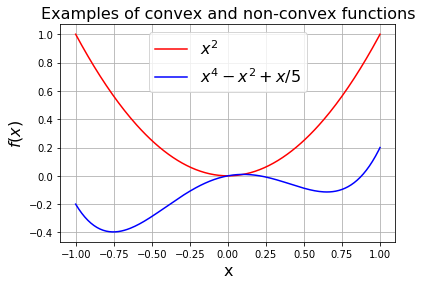

In [18]:
%matplotlib inline

step = 0.01
max_x = 1
x = np.arange(-max_x, max_x + step, step)
y1 = x ** 2
y2 = x ** 4 - x ** 2 + x / 5.0

plt.plot(x, y1, "-r", label="$x^2$")
plt.plot(x, y2, "-b", label="$x^4 - x^2 + x / 5$")
plt.grid()
plt.xlabel("x", fontsize=16)
plt.ylabel("$f(x)$", fontsize=16)
plt.title("Examples of convex and non-convex functions", fontsize=16)
plt.legend(fontsize=16)

The basic structure of the optimization problem that we want to solve can be written down in the following form:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & f(x)  \\
\text{subject to} \;\; & h_{i} (x) = 0,\;\; \forall \;\; 1 \leq i \leq m  \;\;\;\;\;\; \text{(equality constraints)}\\
& g_{j} (x) \geq 0,\;\; \forall \;\; 1 \leq j \leq p, \;\;\;\; \text{(inequality constraints)}
\end{split}
\end{equation}
$$

where $x \in \mathbb{R}^n,\;\;$ $f,\; h_i,\; g_j : \mathbb{R}^n \rightarrow \mathbb{R}$ are twice continuously differentiable, for all $1 \leq i \leq m$, and $1 \leq j \leq p$.

Only in some very special cases, for example if the function is convex, can one find a solution that is a global optimum to the optimization problem above. In most cases we will only be concerned with finding a local optimum, i.e. we want to find a point $x^{\ast} \in \Omega$, such that there exists a neighborhood $\mathcal{V} \subset \Omega$, $x^{\ast} \in \mathcal{V}$, such that $f(x^{\ast}) \leq f(y)$, for all $y \in \mathcal{V}$. Finding such a local optimum $x^{\ast}$ is the goal of **local optimization**. Throughout we will assume that a local optimum exists. Of course, this can only be done up to some accuracy on a finite precision computer.

```scipy.optimize``` provides two general methods for this task:
- ```scipy.optimize.minimize_scalar``` for univariate optimization problems documented <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar" style="text-decoration: none;">here</a>.
- ```scipy.optimize.minimize``` for multivariate optimization problems documented <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize" style="text-decoration: none;">here</a>.

We will first study univariate minimization, as it is much simpler than the multivariate case. For the multivariate optimization case, the user needs to know how the objective function and the constraints need to be modeled using objects (or classes) that have a standardized interface.

***
## 2.1 Univariate minimization
The one dimensional local optimization problem reads as the following:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & f(x)  \\
\text{subject to} \;\; & b_{lb} \leq x \leq b_{ub}
\end{split}
\end{equation}
$$

where $f : \mathbb{R} \rightarrow \mathbb{R}$, and $x,\; b_{lb},\; b_{ub} \in \mathbb{R}$, and notice that the general case above reduces to the special case, as typically for univariate problems we do not have nonlinear constraints.

We illustrate the usage of ```scipy.optimize.minimize_scalar``` below, but there are a few important arguments to this function that the user must be aware of:
- ```fun```: This is just a function that accepts a scalar $x \in \mathbb{R}$ and returns the function value $f(x)$.
- ```method```: There are three main optimization algorithms that are implemented - a) ```Brent```, b) ```Bounded```, and c) ```Golden```.
- ```bracket```: This is required if the methods chosen are either ```Brent``` or ```Golden```.
- ```bounds```: This is required if the method chosen is ```Bounded```.

Detailed documentation of all the arguments to ```scipy.optimize.minimize_scalar``` can be found <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar" style="text-decoration: none;">here</a>.

The method ```Golden``` refers to the **Golden-section** search method, as described <a href="https://en.wikipedia.org/wiki/Golden-section_search" style="text-decoration: none;">here</a>. The ```Brent``` method improves on golden-section search by using inverse parabolic interpolation to speed up convergence (more information <a href="https://en.wikipedia.org/wiki/Brent%27s_method" style="text-decoration: none;">here</a>), while the ```Bounded``` method is exactly the ```Brent``` method with the added guarantee that the solution always lies in an input interval.

The original interfaces to these methods are given below and they can still be invoked, but now all of them are integrated through the method ```scipy.optimize.minimize_scalar```. However the documentation to these original interfaces to the three methods contain useful information and should be read by the user:
- ```Brent```: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html#scipy.optimize.brent" style="text-decoration: none;">https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html#scipy.optimize.brent</a>
- ```Bounded```: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fminbound.html#scipy.optimize.fminbound" style="text-decoration: none;">https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fminbound.html#scipy.optimize.fminbound</a>
- ```Golden```: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.golden.html#scipy.optimize.golden" style="text-decoration: none;">https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.golden.html#scipy.optimize.golden</a>

***
### 2.1.1 Bracket
The parameter ```bracket``` deserves a brief discussion. This parameter can either be a tuple of the form $(a,c)$, or $(a,b,c)$, and achieves the same functionality as for the method <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bracket.html#scipy.optimize.bracket">```scipy.optimize.bracket```</a>. If a tuple $(a,b,c)$ is input then it is assumed that both $f(b) < f(a)$ and $f(b) < f(c)$. If a tuple $(a,b)$ is input then a new tuple $(a',b',c')$ is generated such that both $f(b') < f(a')$, and $f(b') < f(c')$, which is also called **auto bracketing**.

We give an example below for the function $f(x) = x^4 - x^2 + \frac{x}{5}$ that we encountered before that demonstrates how auto bracketing works .

In [18]:
# Define the function
def func_local_1d_opt(x):
    return x ** 4 - x ** 2 + x / 5.0

# Bracketing examples (notice that inputs need not satisfy xa < xb)
xa, xb, xc, fa, fb, fc, fcalls = sciopt.bracket(func=func_local_1d_opt, xa=0, xb=1)
print("Bracketing interval:")
print("xa =", xa, ", xb =", xb, ", xc =", xc)
print("\n")
print("Function values:")
print("f(xa) =", fa, ", f(xb) =", fb, ", f(xc) =", fc)
print("\n")
print("Number of function calls:", fcalls)

Bracketing interval:
xa = 1 , xb = 0 , xc = -1.618034


Function values:
f(xa) = 0.2 , f(xb) = 0.0 , f(xc) = 3.9124613317185273


Number of function calls: 3


***
### Example 2.1.1
Let us now solve the problem of minimizing the same function $f(x) = x^4 - x^2 + \frac{x}{5}$, which is graphed again below for convenience.

Text(0,0.5,'$x^4 - x^2 + x / 5$')

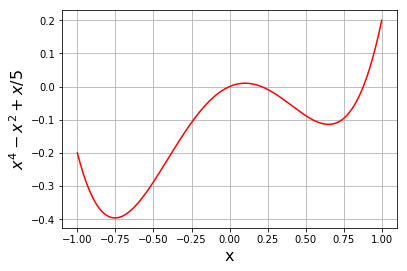

In [20]:
%matplotlib inline

step = 0.01
max_x = 1
x = np.arange(-max_x, max_x + step, step)
y1 = x ** 4 - x ** 2 + x / 5.0

plt.plot(x, y1, "-r")
plt.grid()
plt.xlabel("x", fontsize=16)
plt.ylabel("$x^4 - x^2 + x / 5$", fontsize=16)

Let us first see what happens if we try to use the method ```Golden``` in different ways.

In [23]:
# Default usage with method Golden
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Golden")
print(res)

     fun: -0.39611014305358877
    nfev: 44
     nit: 39
 success: True
       x: -0.752618571828636


Notice that specifying the ```bounds``` parameter has no impact.

In [24]:
# Usage with method Golden, and bounds
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Golden", bounds=[0, 1])
print(res)

     fun: -0.39611014305358877
    nfev: 44
     nit: 39
 success: True
       x: -0.752618571828636


But specifying ```bracket``` does have an impact.

In [27]:
# Usage with method Golden, and bracket

# Usage 1 (specifying exact bracket)
print("Usage 1: Specifying exact brackets")
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Golden", bracket=[0.9, 0.75, 0.1])
print(res)
print("\n")

# Usage 2 (auto bracketing) - notice that bounds are not enforced
print("Usage 2: Auto bracketing")
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Golden", bracket=[1, 0])
print(res)

Usage 1: Specifying exact brackets
     fun: -0.11399411614674623
    nfev: 43
     nit: 38
 success: True
       x: 0.6504879939587682


Usage 2: Auto bracketing
     fun: -0.39611014305358877
    nfev: 44
     nit: 39
 success: True
       x: -0.752618571828636


Let us next try the same set of experiments with the method ```Brent```.

In [28]:
# Default usage with method Brent
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Brent")
print("Default usage")
print(res)
print("\n")

# Usage with method Brent, and bounds
print("Usage of bounds")
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Brent", bounds=[0, 1])
print(res)
print("\n")

# Usage with method Brent, and exact bracketing
print("Usage of exact bracketing")
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Brent", bracket=[1, 0.75, 0])
print(res)
print("\n")

# Usage with method Brent, and auto bracketing
print("Usage of auto bracketing")
res = sciopt.minimize_scalar(fun=func_local_1d_opt, method="Brent", bracket=[1, 0])
print(res)

Default usage
     fun: -0.3961101430535888
    nfev: 17
     nit: 13
 success: True
       x: -0.7526185722496597


Usage of bounds
     fun: -0.3961101430535888
    nfev: 17
     nit: 13
 success: True
       x: -0.7526185722496597


Usage of exact bracketing
     fun: -0.1139941161467462
    nfev: 14
     nit: 10
 success: True
       x: 0.6504879964744865


Usage of auto bracketing
     fun: -0.3961101430535888
    nfev: 17
     nit: 13
 success: True
       x: -0.7526185722496597


***
### InClass Exercise 5
You are left to try the method ```Bounded``` in this exercise.

a) Repeat the 4 experiments as done before with the method ```Bounded```. In particular you should make sure that the parameter ```bounds``` is not optional.

b) Try different intervals for the bounds and make sure that the solution lies within it. In particular, try the bound $(-0.25, 0.25)$.

c) Compare the number of iterations required versus using the method ```Golden```.

In [25]:
# Write your code here

***
## 2.2 Multivariate minimization
We now turn to the more general (and much more difficult) case of multivariate minimization using the method ```scipy.optimize.minimize```. This method supports a lot of varied usage and is the workhorse for solving local optimization problems using ```scipy.optimize```. We will only be able to provide a brief overview of all the functionalities, and the user should read the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize" style="text-decoration: none;">documentation page</a> for more details.

However before we look at specific examples, it is necessary to take a small detour and understand how we model constraints for such optimization problems.

***
### 2.2.1 Handling constraints
There are three general classes that ```scipy``` provides that allow us to model constraints:
- ```scipy.optimize.LinearConstraint```: This can be used to model both linear equality and inequality constraints.
- ```scipy.optimize.Bounds```: This can be used only to model bound constraints.
- ```scipy.optimize.NonlinearConstraint```: This can be used to model more general non-linear equality and inequality constraints.

These three classes cover among them almost any constraint that you will write down for any optimization problem.

#### ```scipy.optimize.LinearConstraint```
This class is documented <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html#scipy.optimize.LinearConstraint" style="text-decoration: none;">here</a>. It allows us to implement linear equality and inequality constraints of the following form:

$$
\begin{equation}
b_{lb} \leq Ax \leq b_{ub}
\end{equation}
$$

where $A \in \mathbb{R}^{m \times n}$ is a matrix, and $b_{lb}, b_{ub} \in \mathbb{R}^{m}$. Any equality constraint can be modeled by setting the lower and upper bounds to be the same for the corresponding entries in the vectors $b_{lb}$ and $b_{ub}$. Any equation which does not have an upper bound can be modeled by setting the corresponding entry in $b_{ub}$ to ```np.inf```, and similarly any equation which does not have a lower bound can be modeled by setting the corresponding entry in $b_{lb}$ to ```-np.inf```.

#### ```scipy.optimize.Bounds```
This class is documented <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.Bounds.html#scipy.optimize.Bounds" style="text-decoration: none;">here</a>. It allows us to implement only bound constraints, which is a very special kind of linear constraint:

$$
\begin{equation}
b_{lb} \leq x \leq b_{ub},
\end{equation}
$$

where $b_{lb}, b_{ub} \in \mathbb{R}^{n}$, i.e. has the same dimension as $x$. Any variable which does not have an upper bound can be modeled by setting the corresponding entry in $b_{ub}$ to ```np.inf```, and similarly any variable which does not have a lower bound can be modeled by setting the corresponding entry in $b_{lb}$ to ```-np.inf```. Thus for any optimization problem we solve, we will always assume that we have bound constraints on all the variables.

#### ```scipy.optimize.NonlinearConstraint```
This class is documented <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.NonlinearConstraint.html#scipy.optimize.NonlinearConstraint" style="text-decoration: none;">here</a>. It allows us to implement general non-linear inequality and equality constraints of the form:

$$
\begin{equation}
b_{lb} \leq c_i(x) \leq b_{ub}, \;\; \forall \;\; 1 \leq i \leq m.
\end{equation}
$$

The treatment of equality constraints or lack of upper or lower bounds is the same as the other two classes. Among the arguments that the method ```scipy.optimize.NonlinearConstraint``` accepts, two of them deserve particular attention from the user: ```jac``` and ```hess```, which are the Jacobian and Hessians of the constraints respectively. They are **different** from the Jacobians and Hessians of the objective function being minimized, and is a source of a lot of confusion.

***
### 2.2.2 Description of the parameters for ```scipy.optimize.minimize```.
Before we get to solving some real optimization problems, we need to understand some of the important parameters that the method ```scipy.optimize.minimize``` accepts. The detailed documentation can be found on the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize" style="text-decoration: none;">documentation page</a> of the method. The important parameters that you must be aware of are:

- ```fun```: A function that implements $f$. It accepts $x \in \mathbb{R}^n$ and returns $f(x) \in \mathbb{R}$. The function can optionally return the Jacobian as well.
- ```x0```: Initial guess of a local minimizer.
- ```method```: The type of solver to use, explained in the next section.
- ```jac```: It can be a function that returns the Jacobian of $f$. In this case, it must accept the same arguments as fun. The Jacobian may also be estimated using finite difference schemes such as ```2-point```, ```3-point```, or ```cs```. If ```jac``` is a Boolean and is ```True```, ```fun``` is assumed to return the Jacobian along with the objective function. If ```False```, the gradient will be estimated using ```2-point``` finite difference estimation.
- ```hess```: A function for computing the Hessian matrix of $f$. Similar to ```jac```, it can also be estimated using the same finite difference schemes. Read the documentation for more details.
- ```hessp```: A function that implements the action of the Hessian of the objective function on an arbitrary vector. Note that only one of ```hess``` or ```hessp``` must be provided. If both are provided, this parameter is ignored.
- ```bounds```: Must be an instance of the class ```scipy.optimize.Bounds``` as described in last section.
- ```constraints```: This parameter is only used when the ```method``` is either ```trust-constr```, ```COBYLA``` or ```SLSQP```. For ```trust-constr```, the constraints must be specified as a list of objects of type ```scipy.optimize.LinearConstraint``` or ```scipy.optimize.NonlinearConstraint```. For the other two methods, the constraints must be specified as dictionaries, and you should read the documentation if you want to ue them.
- ```options```: A dictionary with optional arguments for the solver ```method```.

One thing that is important to note here to avoid confusion is that the Jacobian of the function $f$ is nothing but the gradient of $f$, which is exactly what ```jac``` needs to calculate.

**Note: One really important thing that the user should keep in mind is that not all of the above parameters can be chosen or activated independent of one another. You should always read the documentation first before you use any new option that you have not used before, and do not know how it works.**

***
### 2.2.3 Description of the ```methods``` parameter, and possible choices
This section is intended to be a short guide to help the user at least get started with some of the basic usage of the function ```scipy.optimize.minimize```. Here we shed some light on the various options that can be chosen for the ```methods``` parameter. Very broadly the methods can be classified into three main categories by the kind of the optimization problems that they can solve:

- **Unconstrained minimization methods**: ```Nelder-Mead```, ```Powell```, ```CG```, ```BFGS```, ```Newton-CG```, ```dogleg```, ```trust-ncg```, ```trust-krylov```, ```trust-exact```
- **Constrained minimization methods (bound only constraints)**: ```L-BFGS-B```, ```TNC```
- **Constrained minimization methods (general constraints)**: ```trust-constr```, ```COBYLA```, ```SLSQP```

Among the unconstrained minimization methods, a further subdivision is possible based on whether the optimization algorithm is zero-order, first-order, or second-order, meaning that the algorithm only uses function values, or the function value and the gradient, or the function value, the gradient and the Hessian information respectively in the three cases. While Quasi-Newton methods estimate the Hessian from the gradient, and thus do not strictly need an implementation of the Hessian to be supplied, we will group them under second-order methods. However the trust region methods are truly different from all of them, and so are classified separately.

- **Zero-order methods**: ```Nelder-Mead```, ```Powell```
- **First-order methods**: ```CG```
- **Second-order methods**: ```BFGS```, ```Newton-CG```
- **Trust region methods**: ```dogleg```, ```trust-ncg```, ```trust-krylov```, ```trust-exact```

The classification given above gives a rough guide as to which method is compatible with which other parameter choices for the other arguments of ```scipy.optimize.minimize```. We illustrate these aspects with some simple examples next.

***
### Example 2.2.1
The first example that we consider is that of an unconstrained optimization problem.
Consider the function

$$
f(x_1, x_2) = \sin (x_1 - a_1) + \sin (x_2 - a_2).
$$

It is graphed below for $a_1 = -2$, and $a_2 = -2$, and as you can see it has a lot of local minima.

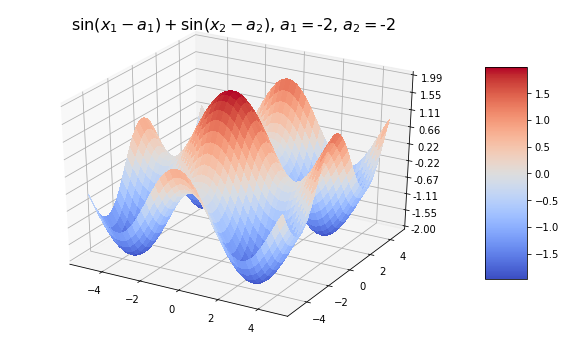

In [30]:
%matplotlib inline

# Define function
def func_sines(x, a):
    return np.sin(x[0] - a[0]) + np.sin(x[1] - a[1])

# Define a
a = [-2, -2]

# Create the function
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.copy(X)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = func_sines(x=[X[i, j], Y[i, j]], a=a)

# Plot the function
fig = plt.figure(figsize=[10, 6])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.65, aspect=5)

plt.title("$\sin (x_1 - a_1) + \sin (x_2 - a_2)$" + ", $a_1 = $" + str(a[0]) + ", $a_2 = $" + str(a[1]), fontsize=16)
plt.show()

Let us code up its Jacobian, Hessian, and Hessian action.

In [31]:
# Define function Jacobian
def func_sines_jac(x, a):
    return np.asarray([np.cos(x[0] - a[0]), np.cos(x[1] - a[1])])

# Define function Hessian
def func_sines_hess(x, a):
    return np.asarray([[-np.sin(x[0] - a[0]), 0], [0, -np.sin(x[1] - a[1])]])

# Define function Hessian * p
def func_sines_hessp(x, p, a):
    return np.asarray([-np.sin(x[0] - a[0]) * p[0], -np.sin(x[1] - a[1]) * p[1]])

Now let us try to find the local minima for this function by starting from $x_0 = (-2, -2)$, and for different choices of methods.

In [32]:
# Define a
a = [-2, -2]

# Define starting point
x0 = [-2, -2]

# Optimize using Nelder-Mead
print("Optimization using Nelder-Mead:")
res = sciopt.minimize(
    fun=func_sines,
    x0=x0,
    args=(a),
    method="Nelder-Mead",
    options={"disp": True}
)
print("Optimal x =", res.x)
print("\n")

# Optimize using Powell
print("Optimization using Powell:")
res = sciopt.minimize(
    fun=func_sines,
    x0=x0,
    args=(a),
    method="Powell",
    options={"disp": True}
)
print("Optimal x =", res.x)
print("\n")

# Optimize using CG
print("Optimization using CG:")
res = sciopt.minimize(
    fun=func_sines,
    x0=x0,
    args=(a),
    method="CG",
    jac=func_sines_jac,
    options={"disp": True}
)
print("Optimal x =", res.x)
print("\n")

# Optimize using BFGS
print("Optimization using BFGS:")
res = sciopt.minimize(
    fun=func_sines,
    x0=x0,
    args=(a),
    method="BFGS",
    jac=func_sines_jac,
    options={"disp": True}
)
print("Optimal x =", res.x)
print("\n")

# Optimize using trust-ncg
print("Optimization using trust-ncg:")
res = sciopt.minimize(
    fun=func_sines,
    x0=x0,
    args=(a),
    method="trust-ncg",
    jac=func_sines_jac,
    hess=func_sines_hess,
    options={"disp": True}
)
print("Optimal x =", res.x)
print("\n")

# Optimize using trust-krylov
print("Optimization using trust-krylov:")
res = sciopt.minimize(
    fun=func_sines,
    x0=x0,
    args=(a),
    method="trust-krylov",
    jac=func_sines_jac,
    hessp=func_sines_hessp,
    options={"disp": True}
)
print("Optimal x =", res.x)
print("\n")

# Optimize using trust-krylov
print("Optimization using trust-krylov:")
res = sciopt.minimize(
    fun=func_sines,
    x0=[-1, -1],
    args=(a),
    method="trust-krylov",
    jac=func_sines_jac,
    hessp=func_sines_hessp,
    options={"disp": True}
)
print("Optimal x =", res.x)
print("\n")

Optimization using Nelder-Mead:
Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 34
         Function evaluations: 65
Optimal x = [-3.57081176 -3.57082473]


Optimization using Powell:
Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 2
         Function evaluations: 42
Optimal x = [-3.57079223 -3.57079223]


Optimization using CG:
Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
Optimal x = [-3.57079633 -3.57079633]


Optimization using BFGS:
Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
Optimal x = [-3.57079633 -3.57079633]


Optimization using trust-ncg:
Optimization terminated successfully.
         Current function value: -2.000000
     

***
### InClass Exercise 6
a) Using the above code as a starting point, try different values of $x_0$, and compare the performance of the zero-order methods ```Nelder-Mead``` and ```Powell```.

b) Using the above code as a starting point, try different values of $x_0$, and compare the performance of the methods ```CG``` and ```BFGS```.

c) For any choice of $x_0$, solve the above problem using ```Newton-CG```. Compare the performance with ```trust-ncg```.

d) Test the performance of choosing ```hess``` vs ```hessp``` as an input argument for the methods ```Newton-CG```, ```trust-ncg```, and ```trust-krylov```, for different values of $x_0$.

In [29]:
# Write your code here

***
### Example 2.2.2
The next example that we consider is that of a constrained optimization problem with simple bound constraints. We consider the same function as before

$$
f(x_1, x_2) = \sin (x_1 - a_1) + \sin (x_2 - a_2).
$$

for $a_1 = -2$, and $a_2 = -2$. We will minimize this function in the region given by $-3 \leq x_1 \leq 3, \;\;-3 \leq x_2 \leq 3$. This leads to the following minimization problem:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & \sin (x_1 - a_1) + \sin (x_2 - a_2)  \\
\text{subject to} \;\; & -3 \leq x_1 \leq 3  \\
& -3 \leq x_2 \leq 3 . \\
\end{split}
\end{equation}
$$

The following Python code solves this problem using the methods ```L-BFGS-B``` and ```TNC```.

In [30]:
def create_bounds(lb, ub):
    return sciopt.Bounds(lb=lb, ub=ub)

def solve_bound_constrained_problem(method_name, bounds, x0, a):
    
    if method_name not in ["L-BFGS-B", "TNC"]:
        raise ValueError("Method must be either L-BFGS-B or TNC")
    
    print("Optimization using " + str(method_name) + ":")
    res = sciopt.minimize(
        fun=func_sines,
        x0=x0,
        args=(a),
        method=method_name,
        jac=func_sines_jac,
        bounds=bounds,
        options={"disp": True}
    )
    print("Optimal x =", res.x)
    print("\n")

if __name__ == "__main__":
    
    # Define a
    a = [-2, -2]

    # Define starting point
    x0 = [-2, -2]
    
    # Create bounds
    bounds = create_bounds(lb=[-3, -3], ub=[3, 3])
    
    # Solve using L-BFGS-B
    solve_bound_constrained_problem(method_name="L-BFGS-B", bounds=bounds, x0=x0, a=a)
    
    # Solve using TNC
    solve_bound_constrained_problem(method_name="TNC", bounds=bounds, x0=x0, a=a)

Optimization using L-BFGS-B:
Optimal x = [-3. -3.]


Optimization using TNC:
Optimal x = [-3. -3.]




***
### Example 2.2.3
We now consider a general non-linear constraint. Consider now the following optimization problem:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & \sin (x_1 - a_1) + \sin (x_2 - a_2)  \\
\text{subject to} \;\; & 3 \leq x_1^2 + x_2^2 \leq 20,
\end{split}
\end{equation}
$$

where again we take $a_1 = -2$, and $a_2 = -2$. The following Python code then solves this problem using the method ```trust-constr```.

In [33]:
# Define constraint (hessian evaluated using finite difference)
def get_circle_constraint(r1, r2):
    
    def f_circle(x):
        return x.dot(x)
    
    def f_circle_jac(x):
        return 2 * x
    
    nl_constraint = sciopt.NonlinearConstraint(
        fun=f_circle,
        lb=r1,
        ub=r2,
        jac=f_circle_jac,
        hess="2-point"
    )
    
    return nl_constraint

def solve_circle_constrained_problem(constraints, x0, a):
    
    print("Optimization using trust-constr:")
    res = sciopt.minimize(
        fun=func_sines,
        x0=x0,
        args=(a),
        method="trust-constr",
        jac=func_sines_jac,
        hessp=func_sines_hessp,
        constraints=constraints,
        options={"disp": True}
    )
    print("Optimal x =", res.x)
    print("\n")

if __name__ == "__main__":
    
    # Define a
    a = [-2, -2]

    # Define starting point
    x0 = [-2, -2]
    
    # Create constraint
    r1 = 3
    r2 = 20
    constraints = get_circle_constraint(r1=r1, r2=r2)
    
    # Solve using trust-constr
    solve_circle_constrained_problem(constraints=constraints, x0=x0, a=a)

Optimization using trust-constr:
`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 3.26e-10, constraint violation: 0.00e+00, execution time: 0.32 s.
Optimal x = [-3.16207451 -3.16207451]




***
### InClass Exercise 7
Solve the following constrained optimization problem:

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & \sin (x_1 - a_1) + \sin (x_2 - a_2)  \\
\text{subject to} \;\; & 1 \leq \frac{x_1^2}{4} + \frac{x_2^2}{9} \leq 8,
\end{split}
\end{equation}
$$

for $a_1 = -2$, and $a_2 = -2$. Choose any appropriate $x_0$.

In [32]:
# Write your code here